In [1]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn

In [2]:
def read_csv_file(csv_file_path):
    try:
        df = pd.read_csv(csv_file_path, delimiter=";")
        return df

    except FileNotFoundError:
        print(f"Error: File not found at '{csv_file_path}'.")

csv_file_path = input("Enter the path to the CSV file: ")   # My path to the CSV file: /Users/*name*/Downloads/sleepdata.csv
df = read_csv_file(csv_file_path)


In [3]:
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


In [4]:
num_observations = len(df)
print(f"Number of Observations: {num_observations}")

Number of Observations: 887


In [5]:
df.isnull().sum()

Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             641
Sleep Notes         235
Heart rate          725
Activity (steps)      0
dtype: int64

In [6]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Time in bed'] = df['End'] - df['Start']
df['Time in bed'] = df['Time in bed'].astype('timedelta64[s]')

df['Sleep quality'] = df['Sleep quality'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(int)


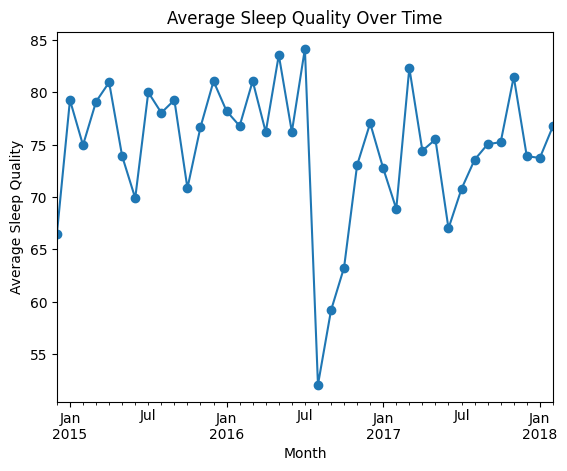

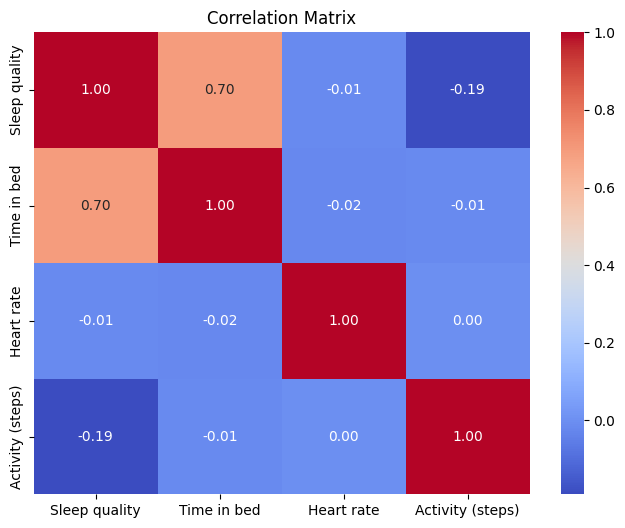

In [7]:
# Data Cleaning

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# For 'Wake up' (categorical column) replace missing values with the mode
df['Wake up'] = df['Wake up'].fillna(df['Wake up'].mode()[0])

# For 'Heart rate' (numeric columns) replace missing values with the mean
df['Heart rate'] = df['Heart rate'].fillna(df['Heart rate'].mean())

# Observations on the Subject Level
# Sleep Quality Over Time
df['Month'] = df['Start'].dt.to_period('M')
avg_sleep_quality_over_time = df.groupby('Month')['Sleep quality'].mean()

avg_sleep_quality_over_time.plot(marker='o')
plt.title('Average Sleep Quality Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sleep Quality')
plt.show()

# Correlation Matrix
correlation_matrix = df[['Sleep quality', 'Time in bed', 'Heart rate', 'Activity (steps)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

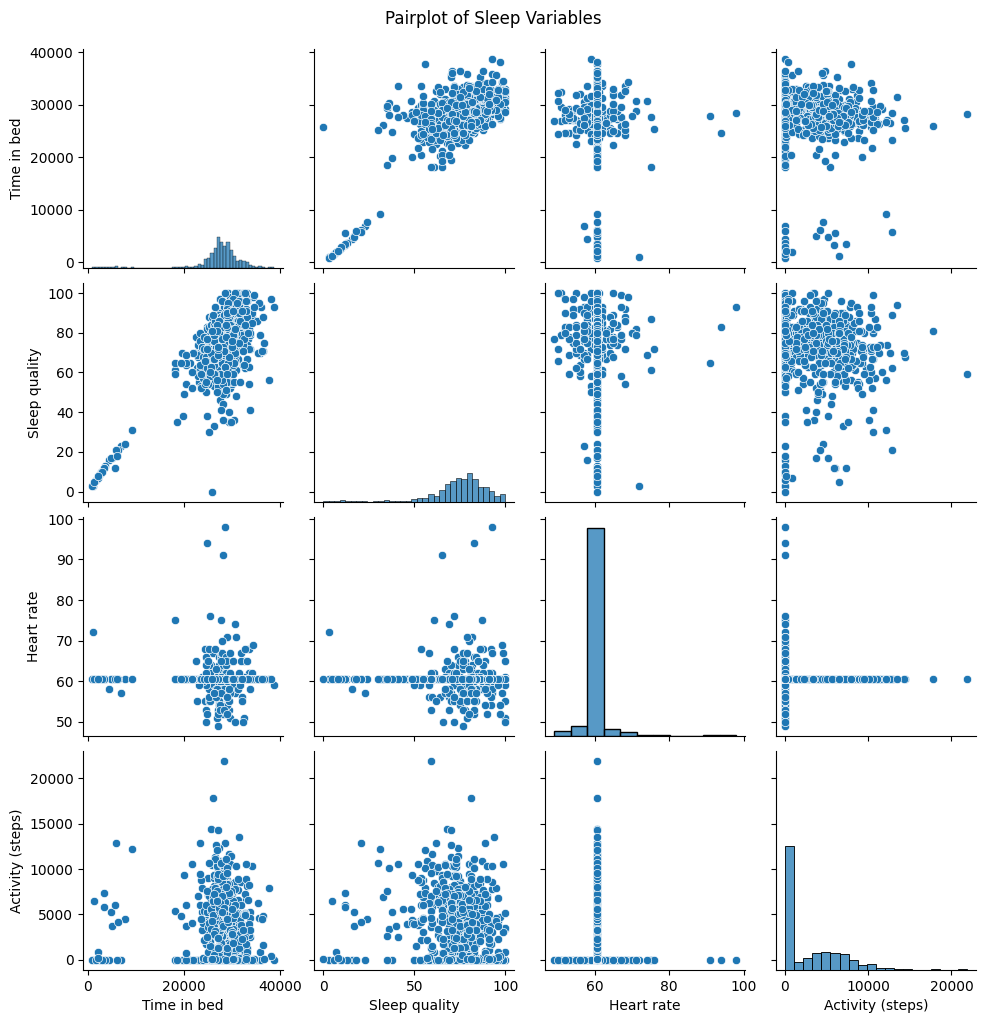

In [8]:
# Pairplot
df['Time in bed'] = df['Time in bed'].dt.total_seconds()
pairplot_data = df[['Time in bed', 'Sleep quality', 'Heart rate', 'Activity (steps)']]
sns.pairplot(pairplot_data)
plt.suptitle('Pairplot of Sleep Variables', y=1.02)
plt.show()

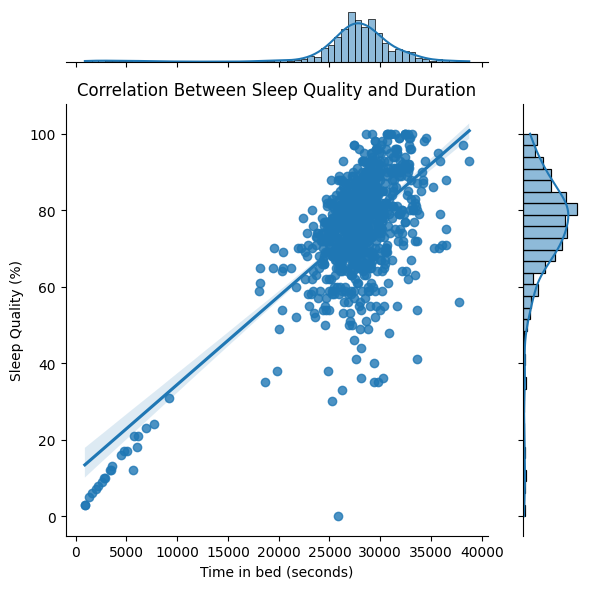

In [9]:
# Joint plot with regression line
sns.jointplot(data=df, x='Time in bed', y='Sleep quality', kind = 'reg')

plt.title('Correlation Between Sleep Quality and Duration')
plt.xlabel('Time in bed (seconds)')
plt.ylabel('Sleep Quality (%)')
plt.tight_layout()
plt.show()

In [10]:
df['Wake up'] = df['Wake up'].replace({':|': 'Moderate', ':)': 'Happy'})

# Sleep notes
df['Drank tea'] = df['Sleep Notes'].apply(lambda x: 'Drank tea' in str(x))
df['Drank coffee'] = df['Sleep Notes'].apply(lambda x: 'Drank coffee' in str(x))
df['Worked out'] = df['Sleep Notes'].apply(lambda x: 'Worked out' in str(x))
df['Ate late'] = df['Sleep Notes'].apply(lambda x: 'Ate late' in str(x))
df['Stressful day'] = df['Sleep Notes'].apply(lambda x: 'Stressful day' in str(x))

df2 = df.copy()
df2.drop(['Sleep Notes', 'Activity (steps)'], inplace=True, axis='columns')

caf_df = df2[['Sleep quality', 'Time in bed', 'Drank tea', 'Drank coffee', 'Worked out', 'Ate late', 'Stressful day']].groupby(['Drank tea', 'Drank coffee']).mean()

caf_df

Sleep quality   Time in bed  Worked out  Ate late  \
Drank tea Drank coffee                                                      
False     False             70.527426  26425.966245    0.004219  0.000000   
          True              74.850515  28125.417526    0.561856  0.025773   
True      False             77.373016  28720.865079    0.531746  0.000000   
          True              77.112121  27559.172727    0.566667  0.048485   

                        Stressful day  
Drank tea Drank coffee                 
False     False              0.004219  
          True               0.118557  
True      False              0.047619  
          True               0.084848

/var/folders/_4/bvw__dkd12l0t9p8cwhr9p140000gn/T/ipykernel_27461/1497103471.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Drank tea', y='Sleep quality', hue='Drank coffee', data=caf_df_reset, palette='viridis', ci=None)


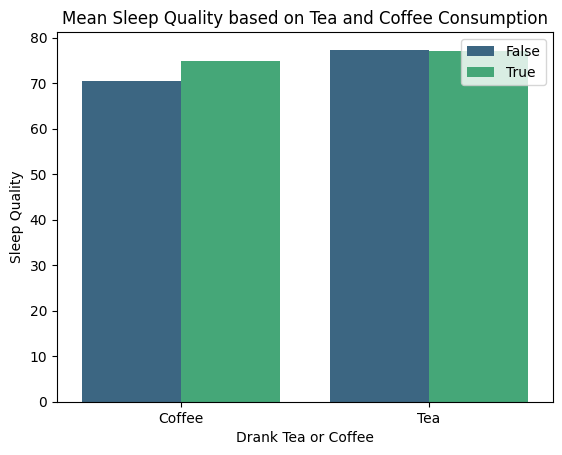

In [11]:
caf_df_reset = caf_df.reset_index()

# Barplot: caffiene
sns.barplot(x='Drank tea', y='Sleep quality', hue='Drank coffee', data=caf_df_reset, palette='viridis', ci=None)

ind = np.arange(2)
width = 0.00

plt.xlabel('Drank Tea or Coffee')
plt.ylabel('Sleep Quality')
plt.title('Mean Sleep Quality based on Tea and Coffee Consumption')
plt.xticks(ind + width / 2, ('Coffee', 'Tea'))

plt.legend( labels=['False', 'True'])
plt.show()

/var/folders/_4/bvw__dkd12l0t9p8cwhr9p140000gn/T/ipykernel_27461/2995169249.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Worked out', y='Sleep quality', data=work_df_reset, palette='muted', ci=None)
/var/folders/_4/bvw__dkd12l0t9p8cwhr9p140000gn/T/ipykernel_27461/2995169249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Worked out', y='Sleep quality', data=work_df_reset, palette='muted', ci=None)


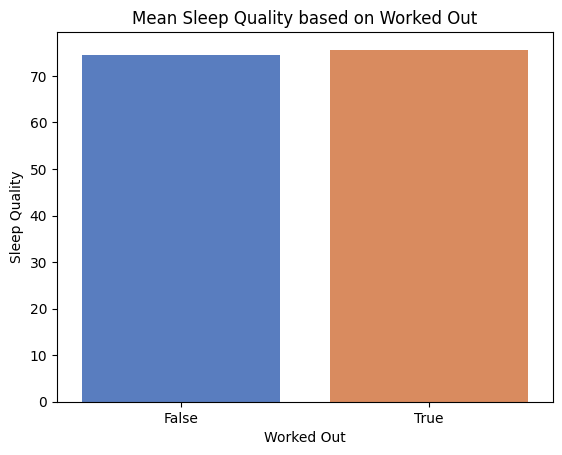

,Sleep quality,Time in bed,Drank tea,Drank coffee,Ate late,Stressful day
Worked out,,,,,,
False,74.388145,27526.118547,0.386233,0.435946,0.015296,0.047801
True,75.623626,27572.750000,0.697802,0.813187,0.035714,0.090659


In [12]:
# Barplot: worked out
work_df = df2[['Sleep quality', 'Time in bed', 'Drank tea', 'Drank coffee', 'Worked out', 'Ate late', 'Stressful day']].groupby(['Worked out']).mean()

work_df_reset = work_df.reset_index()

sns.barplot(x='Worked out', y='Sleep quality', data=work_df_reset, palette='muted', ci=None)

plt.xlabel('Worked Out')
plt.ylabel('Sleep Quality')
plt.title('Mean Sleep Quality based on Worked Out')
plt.xticks([0, 1], ['False', 'True'])

plt.show()
work_df

/var/folders/_4/bvw__dkd12l0t9p8cwhr9p140000gn/T/ipykernel_27461/3282454015.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Worked out', y='Sleep quality', data=stress_df_reset, palette='muted', ci=None)
/var/folders/_4/bvw__dkd12l0t9p8cwhr9p140000gn/T/ipykernel_27461/3282454015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Worked out', y='Sleep quality', data=stress_df_reset, palette='muted', ci=None)


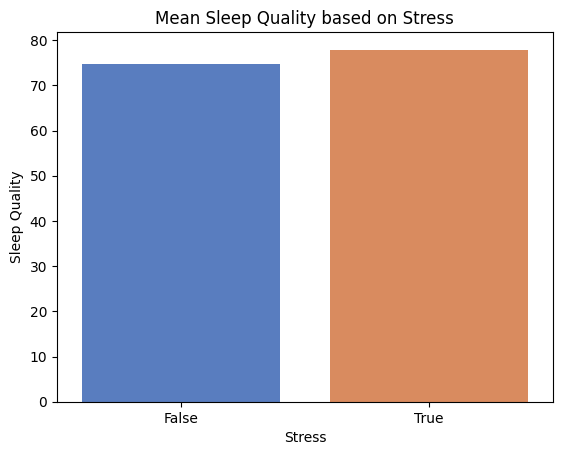

,Sleep quality,Time in bed,Drank tea,Drank coffee,Worked out,Ate late
Stressful day,,,,,,
False,74.686369,27526.059107,0.509047,0.570567,0.399276,0.024125
True,77.879310,27819.620690,0.586207,0.879310,0.568966,0.017241


In [13]:
# Barplot: stress
stress_df = df2[['Sleep quality', 'Time in bed', 'Drank tea', 'Drank coffee', 'Worked out', 'Ate late', 'Stressful day']].groupby(['Stressful day']).mean()

stress_df_reset = stress_df.reset_index()

sns.barplot(x='Worked out', y='Sleep quality', data=stress_df_reset, palette='muted', ci=None)

plt.xlabel('Stress')
plt.ylabel('Sleep Quality')
plt.title('Mean Sleep Quality based on Stress')
plt.xticks([0, 1], ['False', 'True'])

plt.show()
stress_df

/Users/afrooz/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


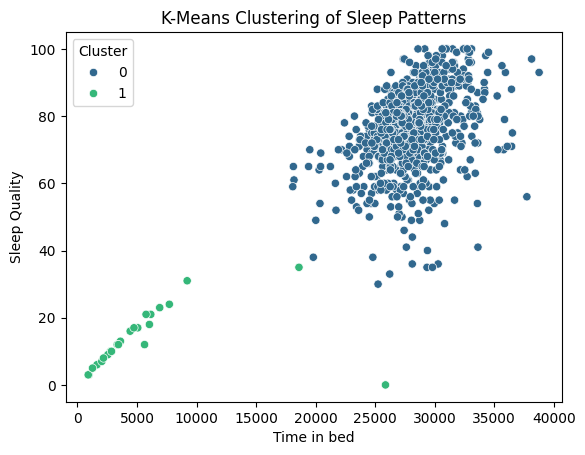

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Clustering
clustering_data = df[['Time in bed', 'Sleep quality', 'Heart rate']]

scaler = StandardScaler()
clustering_data_standardized = scaler.fit_transform(clustering_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42) 
df['Cluster'] = kmeans.fit_predict(clustering_data_standardized)

sns.scatterplot(x='Time in bed', y='Sleep quality', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Sleep Patterns')
plt.xlabel('Time in bed')
plt.ylabel('Sleep Quality')
plt.show()



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Machine learning
X = df[['Time in bed', 'Activity (steps)','Drank tea', 'Drank coffee', 'Worked out', 'Ate late', 'Stressful day' ]].values
y = df['Sleep quality'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Normalize features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

print('test accuracy:', lm.score(X_test,y_test))

test accuracy: 0.41938258338812884


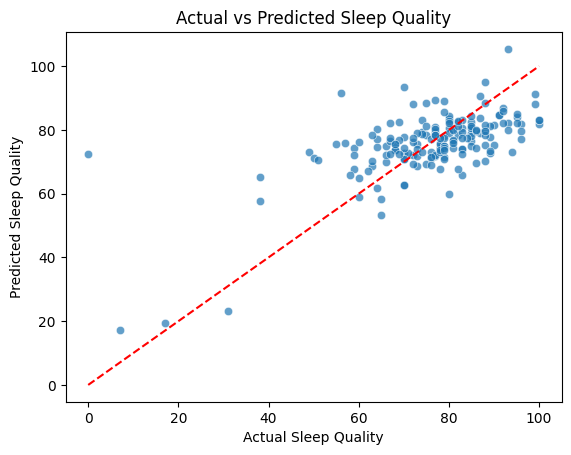

In [17]:
y_pred = lm.predict(X_test)

# Visualize actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.title('Actual vs Predicted Sleep Quality')
plt.xlabel('Actual Sleep Quality')
plt.ylabel('Predicted Sleep Quality')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()

In [18]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

print('test accuracy:', logmodel.score(X_test,y_test))

test accuracy: 0.05056179775280899


In [19]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)

print('test accuracy:', rfc.score(X_test,y_test))

test accuracy: 0.03932584269662921


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
print('test accuracy:', rfc.score(X_test,y_test))